In [1]:
import numpy as np
import pylab as plt
from scipy.signal import savgol_filter

import matplotlib
'''To make the tex-style/mathtext text look like the regular text, 
you need to set the mathtext font to Bitstream Vera Sans:'''

matplotlib.rcParams['mathtext.fontset'] = 'custom'
# set the font
plt.rcParams["font.family"] = 'arial' #'Bitstream Vera Sans'# 'arial' #
matplotlib.rcParams['mathtext.rm'] = 'arial' #'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'arial:italic' #'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'arial:bold' #'Bitstream Vera Sans:bold'
#fig, ax = plt.subplots(figsize=(5, 4))
#matplotlib.pyplot.title(r'ABC123 vs $ABC^2\mathrm{ABC123}^{123}\mathsf{ABCabc}$')

'''If you want the regular text to look like the mathtext text, 
you can change everything to Stix. This will affect labels, titles, ticks, etc.'''


#define the class to read data files
class getCol:
    matrix = []
    def __init__(self, file, delim):          #file name, delimenter
        #with open(file, 'rU') as f: 
        f=open(file, 'rU').readlines()[11:]   #skip the headerlines   
        getCol.matrix =[filter(None, line.rstrip('\n').split(delim)) for line in f]

    def __getitem__ (self, key):
        column = []
        for row in getCol.matrix:
            try:
                column.append(row[key])
            except IndexError:
                # pass
                column.append("")
        return column
#define the function to smooth the data by averaging in a box
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

#the percentage of the vollum for each constrains 
#Normalized the probabilities


#norm=np.array([10.3,1.7,12,100])/100
norm=np.array([54402,5000,62642,124996])/62642.
norm=np.array([54402,9184,62642,124996])/62642.
# the nb of points for every dipolar field calcualation, to normalize the probability for O8a+O48f
# because the girds for for them should have the some nb of point but it is not true (82,41,82,50) 
#so we use 62642-54402 for the 2nd data file
print norm

[ 0.86845886  0.1466109   1.          1.99540245]


In [2]:
# load data: only at O48f
fpath='D:/4_muonSR/mmcalc-1.1beta\output/ndzro_only_on_O48_82GridPts-frequency-histogram.tsv'
#print getCol(fpath,'\t')[0]
#print getCol(fpath,'\t')[1]
#freq0=map(float, getCol(fpath,'\t')[0])
#prob0=map(float, getCol(fpath,'\t')[1])


fmhz=np.asarray(map(float, getCol(fpath,'\t')[0]))/1.732e6 
#Freqecy in MHz (1e6):Take the 1st col in the dada file and normalize it to 1ub 
#because the calculation uses 3^0.5ub for convinience； converte to MHz by /10e6

pmhz=np.asarray(map(float, getCol(fpath,'\t')[1]))*1.732e6*norm[0]
#Probabil/MHZ:Take the 2nd col in the dada file and normalize it to 1ubMhZ becuase the raw data file just a histogram 
#with a certain nb of bins （nb of points in a bin / bin lengh）

spmhz=smooth(pmhz,5)
smoth = savgol_filter(pmhz, 11, 3) 

#print fmhz
#print pmhz
#plt.plot(fmhz,pmhz,label='unconstrained')

In [3]:
# load data: only at O8a
fpath3='D:/4_muonSR/mmcalc-1.1beta\output/ndzro_only_o8a-frequency-histogram.tsv'
fpath3='D:/4_muonSR/mmcalc-1.1beta\output/ndzro_only_o8a_82GridPts-frequency-histogram.tsv'

fmhz3=np.asarray(map(float, getCol(fpath3,'\t')[0]))/1.732e6
pmhz3=np.asarray(map(float, getCol(fpath3,'\t')[1]))*1.732e6*norm[1]
spmhz3=smooth(pmhz3,10)
smoth3 = savgol_filter(pmhz3, 11, 3) # window size 11, polynomial order 3


In [4]:
# load data: on O48f and O8a
fpath1='D:/4_muonSR/mmcalc-1.1beta\output/ndzro_on_O48_O8_82GridPts-frequency-histogram.tsv'

fmhz1=np.asarray(map(float, getCol(fpath1,'\t')[0]))/1.732e6
pmhz1=np.asarray(map(float, getCol(fpath1,'\t')[1]))*1.732e6*norm[2]
spmhz1=smooth(pmhz1,5)
smoth1 = savgol_filter(pmhz1, 11, 3) # window size 11, polynomial order 3


In [5]:
# load data: unconstrained
fpath2='D:/4_muonSR/mmcalc-1.1beta\output/ndzro_no_constr_50GridPts-frequency-histogram.tsv'

fmhz2=np.asarray(map(float, getCol(fpath2,'\t')[0]))/1.732e6
pmhz2=np.asarray(map(float, getCol(fpath2,'\t')[1]))*1.732e6*norm[3]
spmhz2=smooth(pmhz2,5)
smoth2 = savgol_filter(pmhz2, 11, 3) # window size 11, polynomial order 3


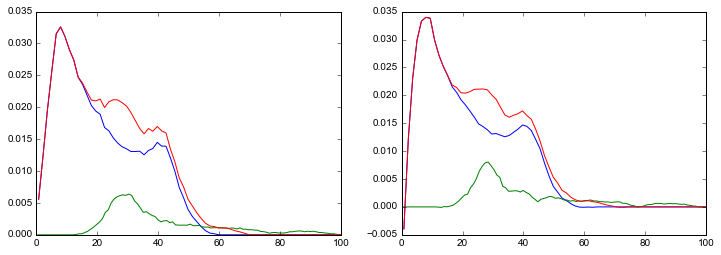

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact, FloatSlider, RadioButtons

xlim=FloatSlider(min=0, max=500, step=50, value=200)
#ylim=FloatSlider(min=0, max=3.0, step=0.1, value=2)
#frequ=FloatSlider(min=-2, max=10.0, step=0.1, value=2)
@interact(xlim0=xlim)
def plot(xlim0):
    fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(12, 4)) #subplot_kw={'axisbg':'#EEEEEE','axisbelow':True})
    #ax.grid(color='w', linewidth=2, linestyle='solid')
    
    axs[0].plot(fmhz,spmhz,label='Only O48f')
    axs[0].plot(fmhz3,spmhz3,label='only O8a')
    axs[0].plot(fmhz1,spmhz1,label='All two O')
    #axs[0].plot(fmhz2,spmhz2,label='Unconstrained')
    
    axs[0].set_xlim(0, xlim0)
    #ax.set_ylim(0, 0.02,0.005)
    #ax.add_axes([0.4,0.14,0.2,0.2]

    axs[1].plot(fmhz,smoth,label='Only O48f')
    axs[1].plot(fmhz3,smoth3,label='only O8a')
    axs[1].plot(fmhz1,smoth1,label='All two O')
    #axs[1].plot(fmhz2,smoth2,label='Unconstrained')
    axs[1].set_xlim(0, xlim0)
    
    
#     plt.xticks(fontsize = 20)
#     plt.yticks(fontsize = 20)
#     #ax.text(.5, -.1, 'Frequency (Mhz)',horizontalalignment='center', size='large',transform=ax.transAxes)
#     plt.ylabel('Probability (/MhZ)',size='large')
#     plt.xlabel('Frequency (Mhz)',size='large')

#     # The frame is matplotlib.patches.Rectangle instance surrounding the legend.   
#     legend = ax.legend(loc='upper right', shadow=True)
#     frame =legend.get_frame()
#     frame.set_facecolor('0.90')
#     # Set the fontsize
#     for label in legend.get_texts():
#         label.set_fontsize('large')
#     for label in legend.get_lines():
#         label.set_linewidth(1.5)  # the legend line width
    plt.show()


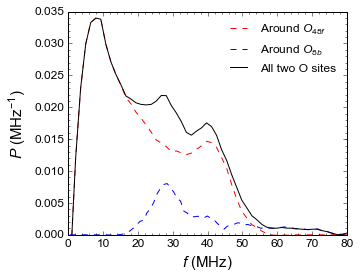

In [13]:
#Export fig
from scipy import interpolate
fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(fmhz,smoth,label=r'Around $O_{48f}$',color='red',linestyle='--')
ax.plot(fmhz3,smoth3,label=r'Around $O_{8b}$',color='blue',linestyle='--')
#ax.plot(fmhz1,smoth1,label='All two O sites',c='black') 

# bacasue cal. P_tot is a little different from P_o1+P_o2, we use the latter replace P_tot
interf = interpolate.interp1d(fmhz3,smoth3)
ax.plot(fmhz,smoth+interf(fmhz),label='All two O sites',c='black')
ax.set_xlim(0, 80)
ax.set_ylim(0, 0.035)
#ax.add_axes([0.4,0.14,0.2,0.2]

plt.minorticks_on()    
plt.xticks(fontsize = 12,size=12)
plt.yticks(fontsize = 12,size=12)

legend = ax.legend(loc='best',frameon=False)
plt.xlabel(r'$f$ (MHz)',size=15)
#plt.xlabel(r'$f$ (MHz/$\mu_{\rm B})$',size=15)
plt.ylabel(r'$P$ (MHz$^{-1}$)',size=15)
plt.savefig('D:/4_muonSR/mmcalc-1.1beta\output/nzo_dipolar_field1.pdf', bbox_inches='tight')